In [1]:
#importing the neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the file
df = pd.read_csv('D:/DS Class/Fliprobo/Project-Housing_splitted/train.csv', na_values='')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [4]:
# The columns below has only:
#Column Name    # values present
#Alley                77
#FireplaceQu          617
#PoolQC               7
#Fence                237
#MiscFeature          44

#Almost 50% to 90% of the data is missing from these columns, we should simply remove them as they can provide us no valuable information.

In [5]:
#Dropping the columns which has huge numbers of null values and also Id as we don't need it
df.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], 1, inplace=True)

In [6]:
#The rows for which BsmtQual has missing values there are some other columns also which have missing values, we are replacing them with '0'
df.loc[df['BsmtQual'].isnull(), 'BsmtCond'] = '0'
df.loc[df['BsmtQual'].isnull(), 'BsmtExposure'] = '0'
df.loc[df['BsmtQual'].isnull(), 'BsmtFinType1'] = '0'
df.loc[df['BsmtQual'].isnull(), 'BsmtFinType2'] = '0'
df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = '0'

In [7]:
#After replacing missing values in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 columns there is still 1 row left in 'BsmtExposure' which is blank, let's put 0 in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 columns
df.loc[df['BsmtExposure'].isnull(), 'BsmtCond'] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtFinType1'] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtFinType2'] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtQual'] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtExposure'] = '0'

In [8]:
#After replacing missing values in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 columns there is still 1 row left in 'BsmtFinType2' which is blank, let's put 0 in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 columns
df.loc[df['BsmtFinType2'].isnull(), 'BsmtCond'] = '0'
df.loc[df['BsmtFinType2'].isnull(), 'BsmtFinType1'] = '0'
df.loc[df['BsmtFinType2'].isnull(), 'BsmtQual'] = '0'
df.loc[df['BsmtFinType2'].isnull(), 'BsmtExposure'] = '0'
df.loc[df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = '0'

In [9]:
# Now that basement is taken care of, let's move onto another monor blank present columns i.e. 'MasVnrType'
#Where Masonry Veneer is missing, we have taken the value of Veneer area also as 0
df.loc[df['MasVnrType'].isnull(), 'MasVnrArea'] = 0
df.loc[df['MasVnrType'].isnull(), 'MasVnrType'] = '0'

In [10]:
#Let's move onto next low missing value column i.e. 'GarageType', there are 64 missing values. Let's treat them.
#Also along with the column 'GarageType' there are other columns related to Garage (GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond)
df.loc[df['GarageType'].isnull(), 'GarageYrBlt'] = 0
df.loc[df['GarageType'].isnull(), 'GarageFinish'] = '0'
df.loc[df['GarageType'].isnull(), 'GarageQual'] = '0'
df.loc[df['GarageType'].isnull(), 'GarageCond'] = '0'
df.loc[df['GarageType'].isnull(), 'GarageType'] = '0'

In [11]:
#Now only one column remaining with missing values and that is 'LotFrontage', since it is also an important aspect of a home.
#Also from teh data file we can see that for missing value in LotFrontage, the area 'LotArea' is not 0 for any row, but it is a minimum of 1974, so we can't simply remove the rows
#Let's predict the missing values using Random Forest regression.
#Where 'LotArea' will be label
#and 'LotFrontage' will be the outcome.
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [12]:
#Making a new data frame which we will use for theregression
df1 = df[['LotArea','LotFrontage']]

In [13]:
#Making the train and test datasets
X_test = df1.loc[df1['LotFrontage'].isnull(), 'LotArea']
X_test = X_test.to_frame()
df1.dropna(inplace=True)
X_train = df1[['LotArea']]
y_train = df1['LotFrontage']

In [14]:
rfr = RandomForestRegressor()

In [15]:
#Training the model
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
#Predicting the LotFrontage
y_test = rfr.predict(X_test)

In [17]:
#Converting the prediction into a dataframe for ease of merging the predicted values of LotFrontage in our main dataset
df2 = pd.DataFrame(y_test, columns=['LotFrontage'])

In [18]:
#Resetting the index for making a new dataset with both columns (LotArea and LotFrontage)
X_test = X_test.reset_index()

In [19]:
#Finally made a dataset of the predicted values
df3 = pd.DataFrame(columns=['LotArea', 'LotFrontage'])
df3['LotArea'] = X_test['LotArea']
df3['LotFrontage'] = df2['LotFrontage']

In [20]:
#Merged the train and test dataset into one for merging the values in ain dataset
df4 = pd.concat([df1,df3],0, ignore_index=True)
df4.rename(columns = {'LotFrontage': 'NewLotFrontage'}, inplace = True)

In [21]:
#Merging the values in main dataset from above concatenated dataframe which contains the predicted value
for i in df['LotArea']:
    df.loc[df['LotArea'] == i, 'LotFrontage'] = df4['NewLotFrontage'][df4.loc[df4['LotArea'] == i, 'NewLotFrontage'].index].to_list()[0]

In [22]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL        41.65     4928   Pave      IR1         Lvl   
1          20       RL        95.00    15865   Pave      IR1         Lvl   
2          60       RL        92.00     9920   Pave      IR1         Lvl   
3          20       RL       105.00    11751   Pave      IR1         Lvl   
4          20       RL        84.11    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub    Inside       Mod  ...             0         0         224   
2    AllPub   CulDSac       Gtl  ...             0         0           0   
3    AllPub    Inside       Gtl  ...             0         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2007        WD         Normal    128000  
1        0       0      10    2007        WD         Normal    268000  
2        0       0       6    2007        WD         Normal    269790  
3        0       0       1    2010       COD         Normal    190000  
4        0       0       6    2009        WD         Normal    215000  

[5 rows x 75 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [24]:
#We have treated all the null values of the dataset, let's move on the EDA

# EDA

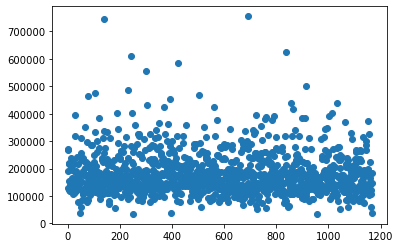

In [25]:
#Distribution of SalePrice
plt.scatter(df.index, df['SalePrice'])
plt.show()

Majority of the SalePrices fall under 300,000, very few houses go above 500,000 price range and only 2 houses go above 700,000.

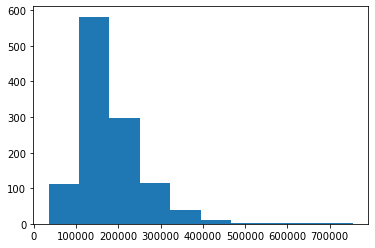

In [26]:
#Distribution of SalePrice
plt.hist(df['SalePrice'])
plt.show()

Maximum houses fall under price tag of 150,000.

In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = df.select_dtypes(include=numerics)

In [28]:
len(numdf.columns)

37

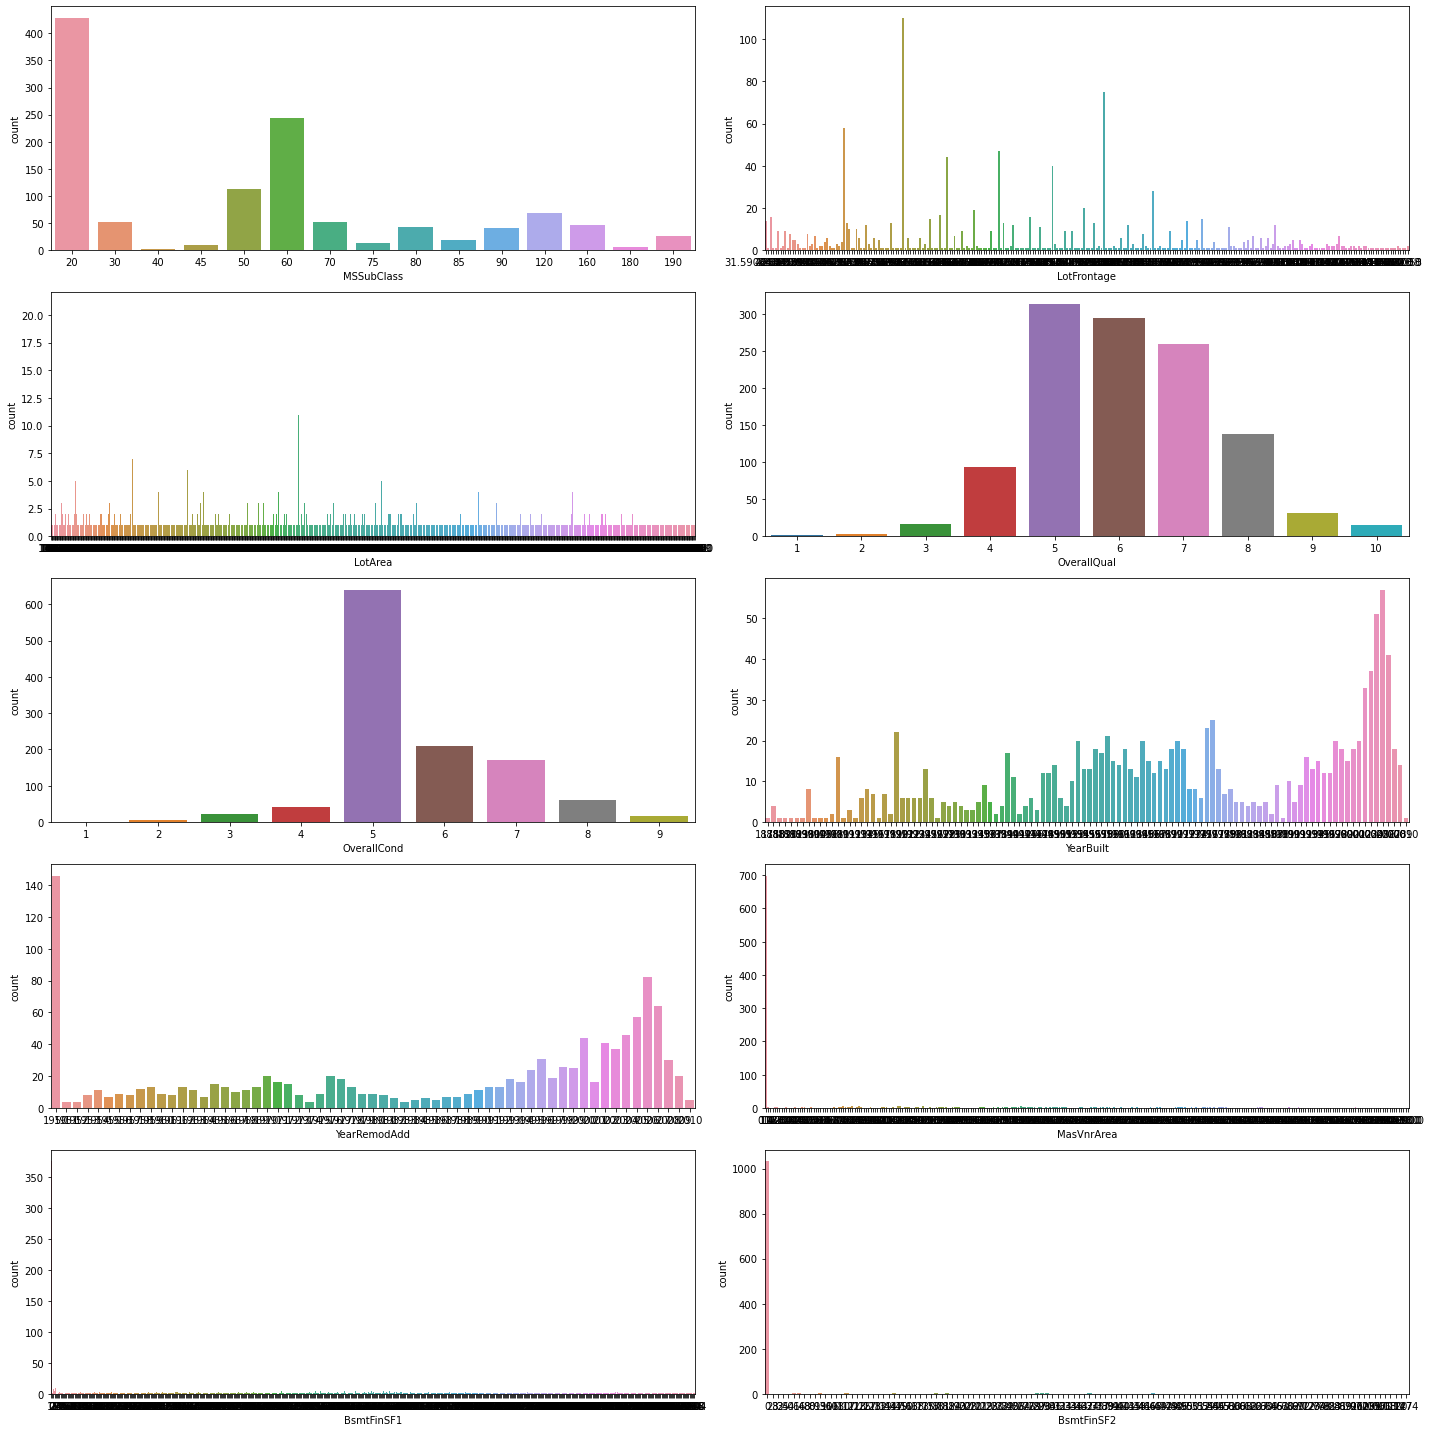

In [29]:
nrow=5
ncol=2
fig, axs = plt.subplots(nrow,ncol,figsize=(20,20))
for i in range(nrow):
    for j in range(ncol):
        ax = axs[i][j]
        r = i*ncol+j
        sns.countplot(numdf[numdf.columns[r]],ax=ax)
plt.tight_layout()

MSSubClass has the highest number of 20 type buildings, followed by 60, then 50. Rest all are quite less

LotFrontage has the majority of data in the first half of the data, which means we can say that low LotFrontage area is more common and rarer as higher we go.

LotArea it is somewhat dependent on the LotFrontage, so it basically means low area will be more common, but we can see that it is quite not the exact case, we can see some higher LotArea not very rare, which means the Frontage is quite long for those houses who have Low LotFrontage but high LotArea, which means these houses are little farther in from the road than the low LotArea houses, which could provide some advantages like low noise, less dust, little more seclusion. But some disadvantages as well, if cars are parked in the Frontage then the car nearest to the house will have to wait for all the other cars behind it to exit first, means LIFO model in cars parking and exit.
Another disdvantage is that it also means there can be house(s) in front of these houses on the roadside front, leaving it narrower area to make the frontage. Which means they will be sold for little less price.

OverallQual is the factor very important in the price of the houses, as it determines the longevity and the maintenance of the houses, higher the quality lesser the damage prone, lesse the maintenance, higher the longevity. In this parameter we can see majority of the houses are medium grade, worst grade houses are very rare, but highest grade houses are low but they are more than worst grade. There are 10 grades of houses so we can say 5.5 or 5 being the medium grade and we can see that grades 5,6,7 and 8 are the most frequent, followed by 4 then 9 then 10, then 2 then 1.

OverallCond It will also depend on the age an the OverallQual, in the graph we can clearly see that it follows the same skewness of the OverallQual.

YearBuilt majority of the houses are newer, as if follows positive skewness.

YearRemodAdd Also same as above 2 parameters.

MasVnrArea There is not much to infer from the graph, same for BsmtFinSF1 and BsmtFinSF2.

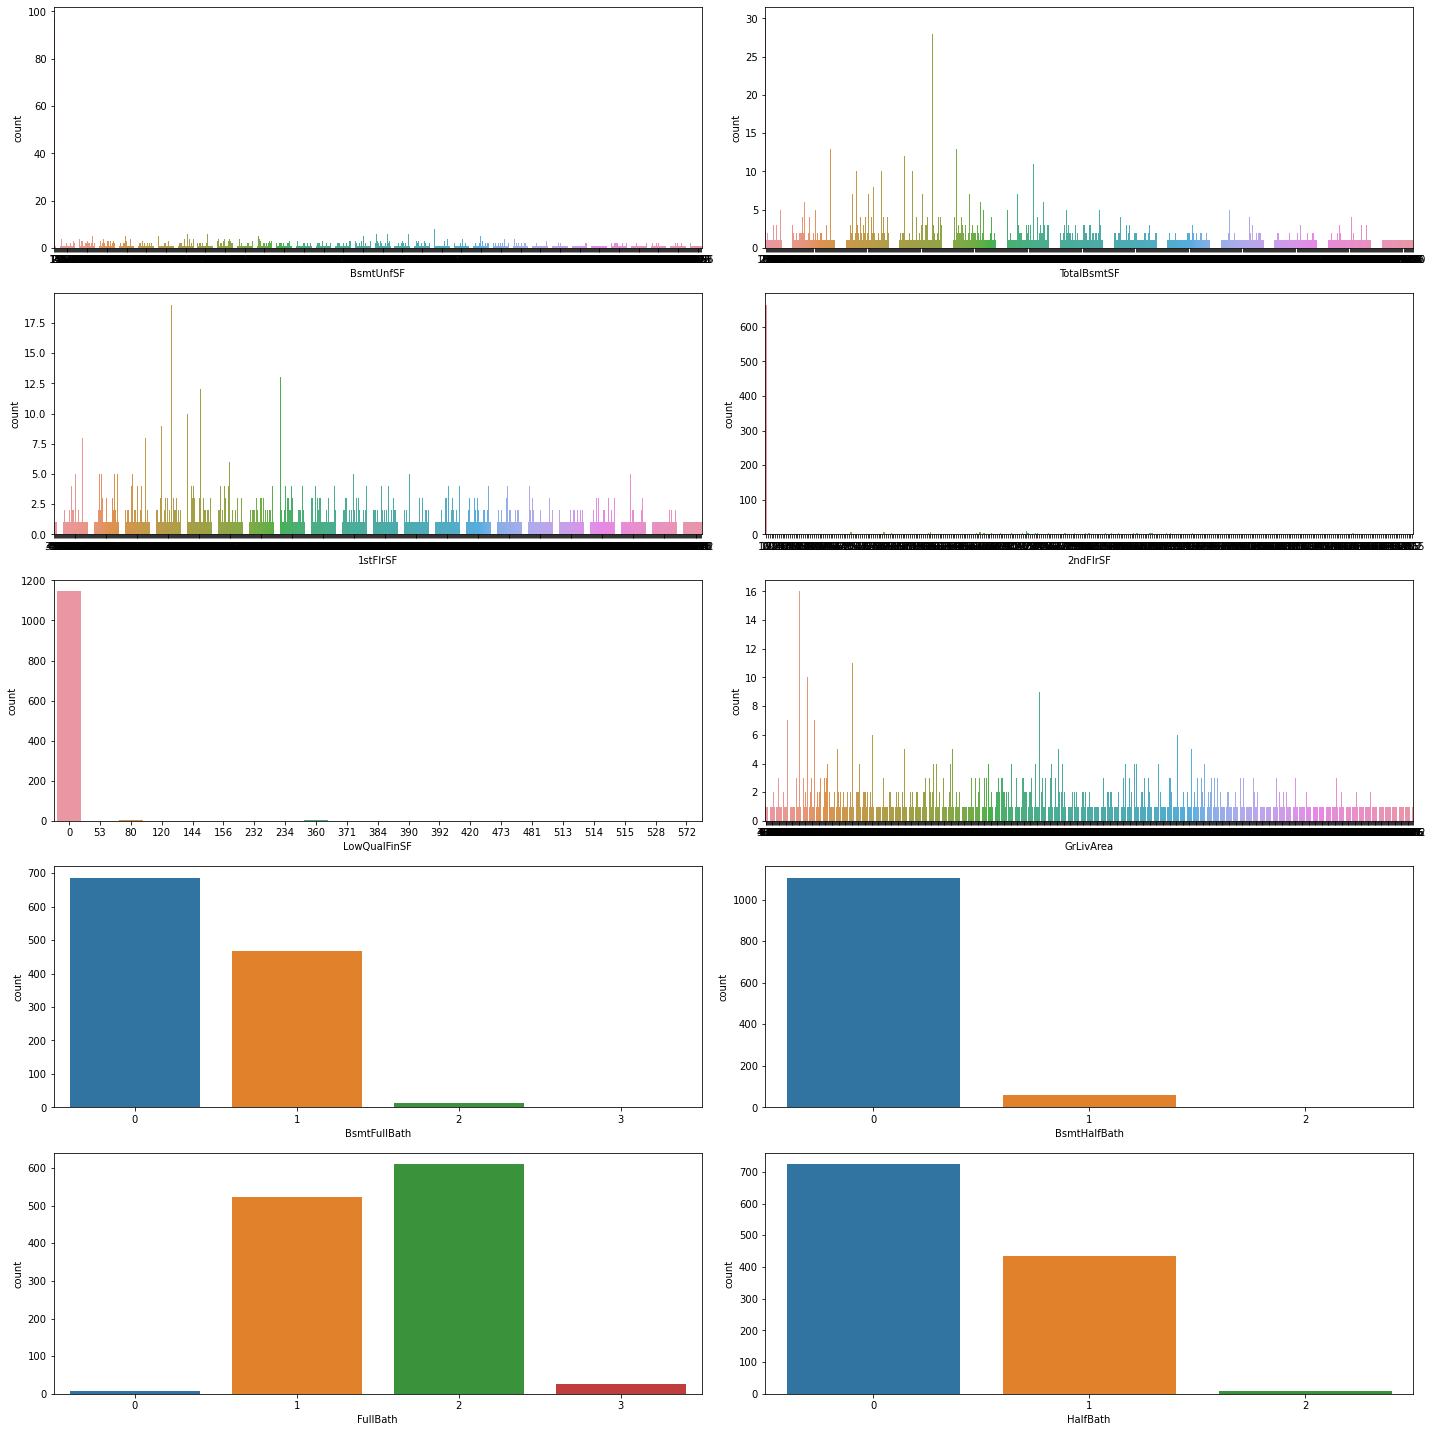

In [30]:
nrow=5
ncol=2
fig, axs = plt.subplots(nrow,ncol,figsize=(20,20))
for i in range(nrow):
    for j in range(ncol):
        ax = axs[i][j]
        r = i*ncol+j+10
        sns.countplot(numdf[numdf.columns[r]],ax=ax)
plt.tight_layout()

LowQualFinSF: This is more frequent on the lower side, means the lower quality finishes are very more, by looking at the graph we can say that low quality finish is the only finish.

BsmtFullBath: They are also more frequent on the lower side, means very less full bathrooms in basement and the other bath parameters graph shows that generally full baths are above ground.

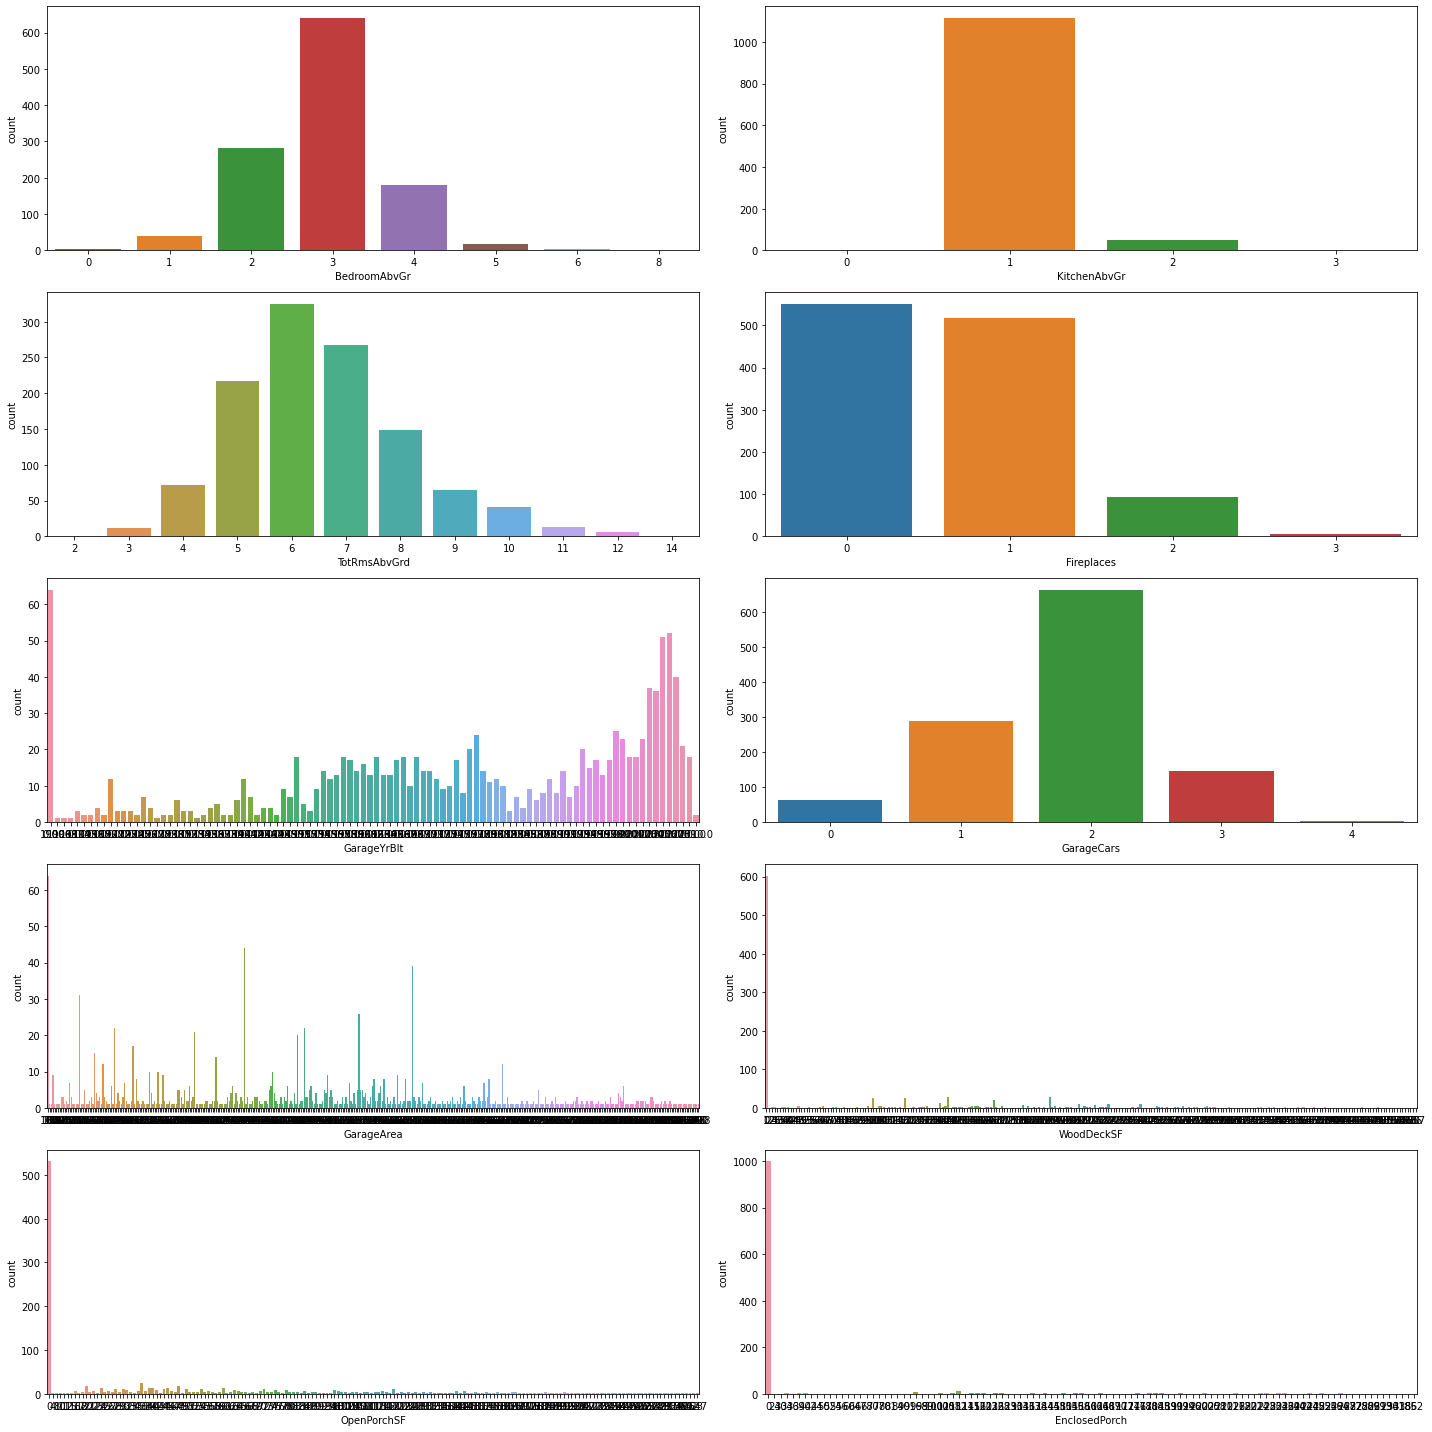

In [31]:
nrow=5
ncol=2
fig, axs = plt.subplots(nrow,ncol,figsize=(20,20))
for i in range(nrow):
    for j in range(ncol):
        ax = axs[i][j]
        r = i*ncol+j+20
        sns.countplot(numdf[numdf.columns[r]],ax=ax)
plt.tight_layout()

There are maximum 3, then 2 then 4 bedroom houes.
Almost all the houese are having single kitchen. Very rarely there are 2 kithcen, no 0 or 3 kitchen or anything else.

Total number of rooms are 6,7,5,8 respectively in order of frequency, means there are maximum houses with 6 rooms followed by 7 then 5 then 8, excluding baths, means they cover stoe room, living area/ lounge, dining area, store, etc.

Fireplaces are o in majority of houses followed by 1 and very rarely 2 and extremely rarely 3.

GarageYrBlt: It obviously depends on the year the house was built, with some houses understandably built garages later than the house itself, so, we can basically say it follows same pattern as house built.

GarageCars: Majority houses with garages capable of parking 2 cars followed by 1 then 3 then 0. GarageAre follows same pattern as GarageCars.

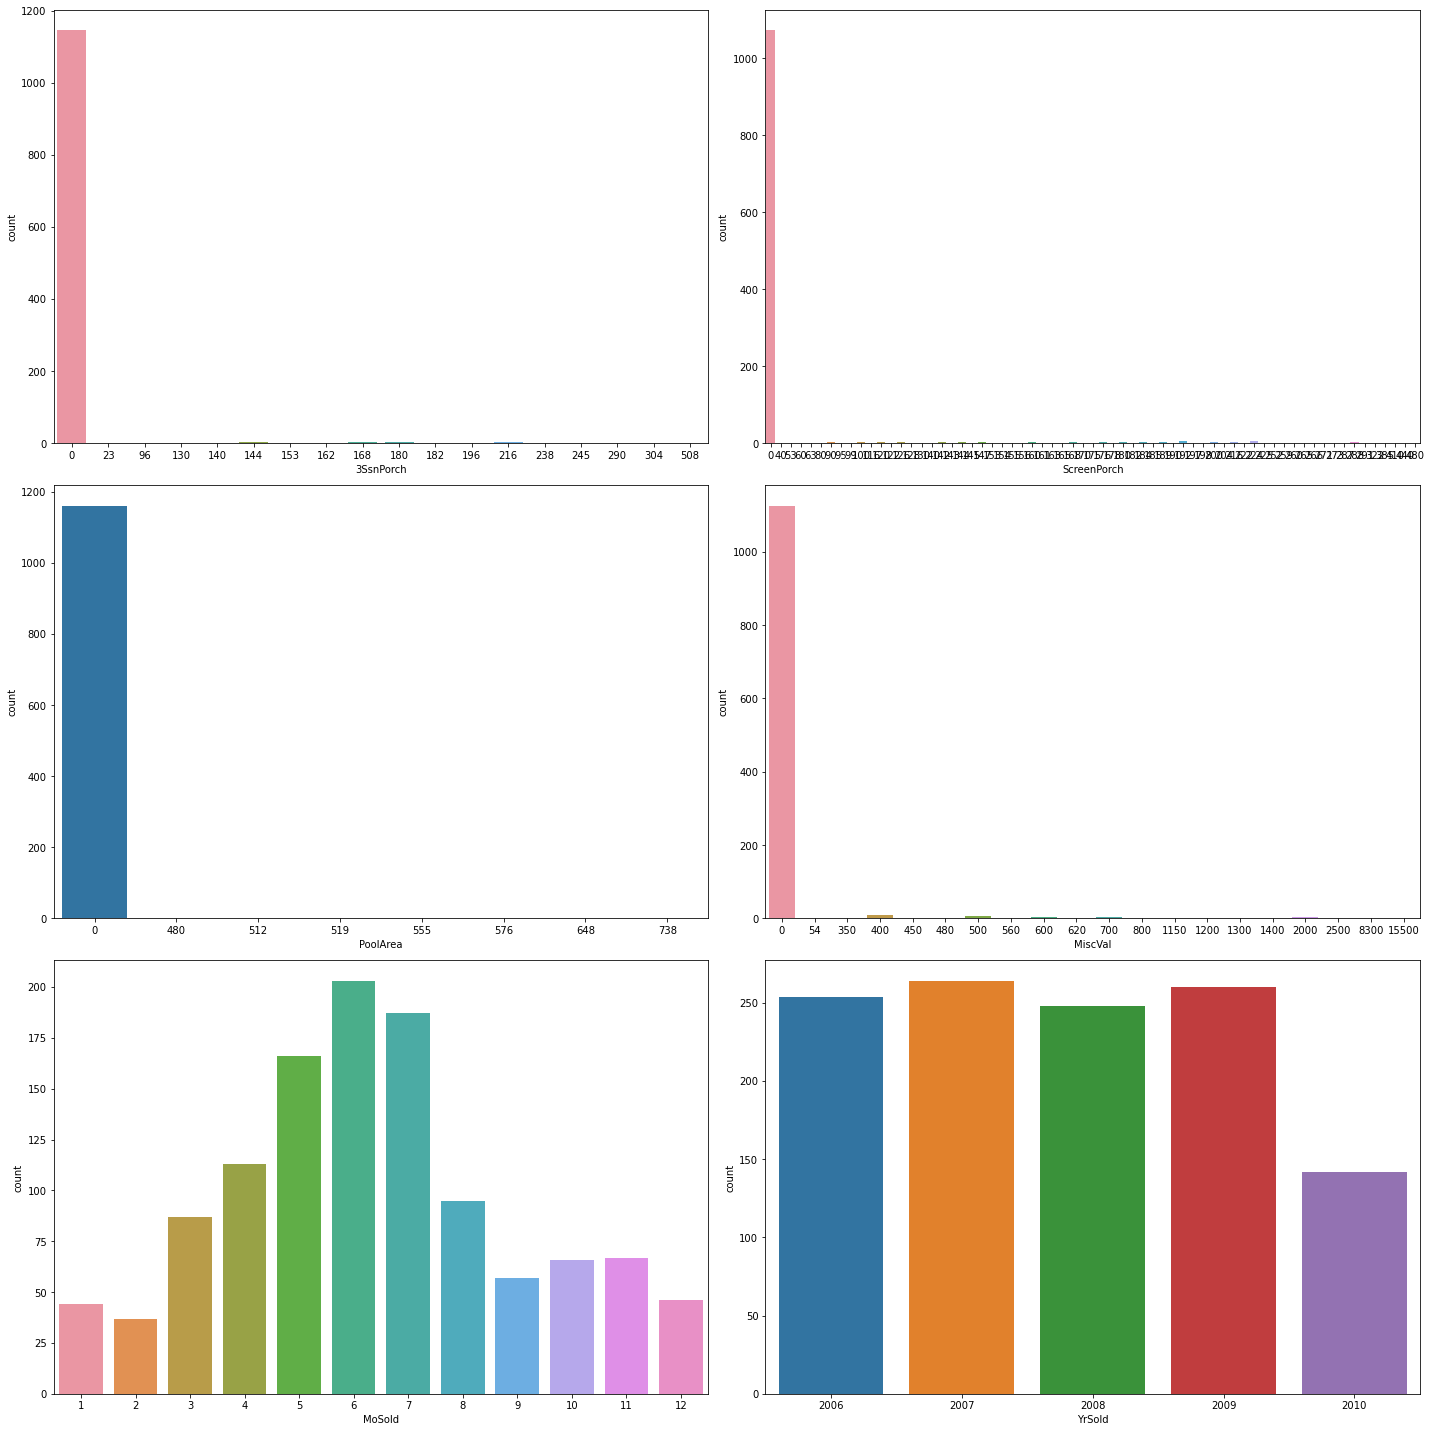

In [32]:
nrow=3
ncol=2
fig, axs = plt.subplots(nrow,ncol,figsize=(20,20))
for i in range(nrow):
    for j in range(ncol):
        ax = axs[i][j]
        r = i*ncol+j+30
        sns.countplot(numdf[numdf.columns[r]],ax=ax)
plt.tight_layout()

Majority of houses were sold in midyear around June July. And all were sold between 2006-2010, with high sales happened in 2007, 2009, 2006 and 2008 and quite less in 2010.

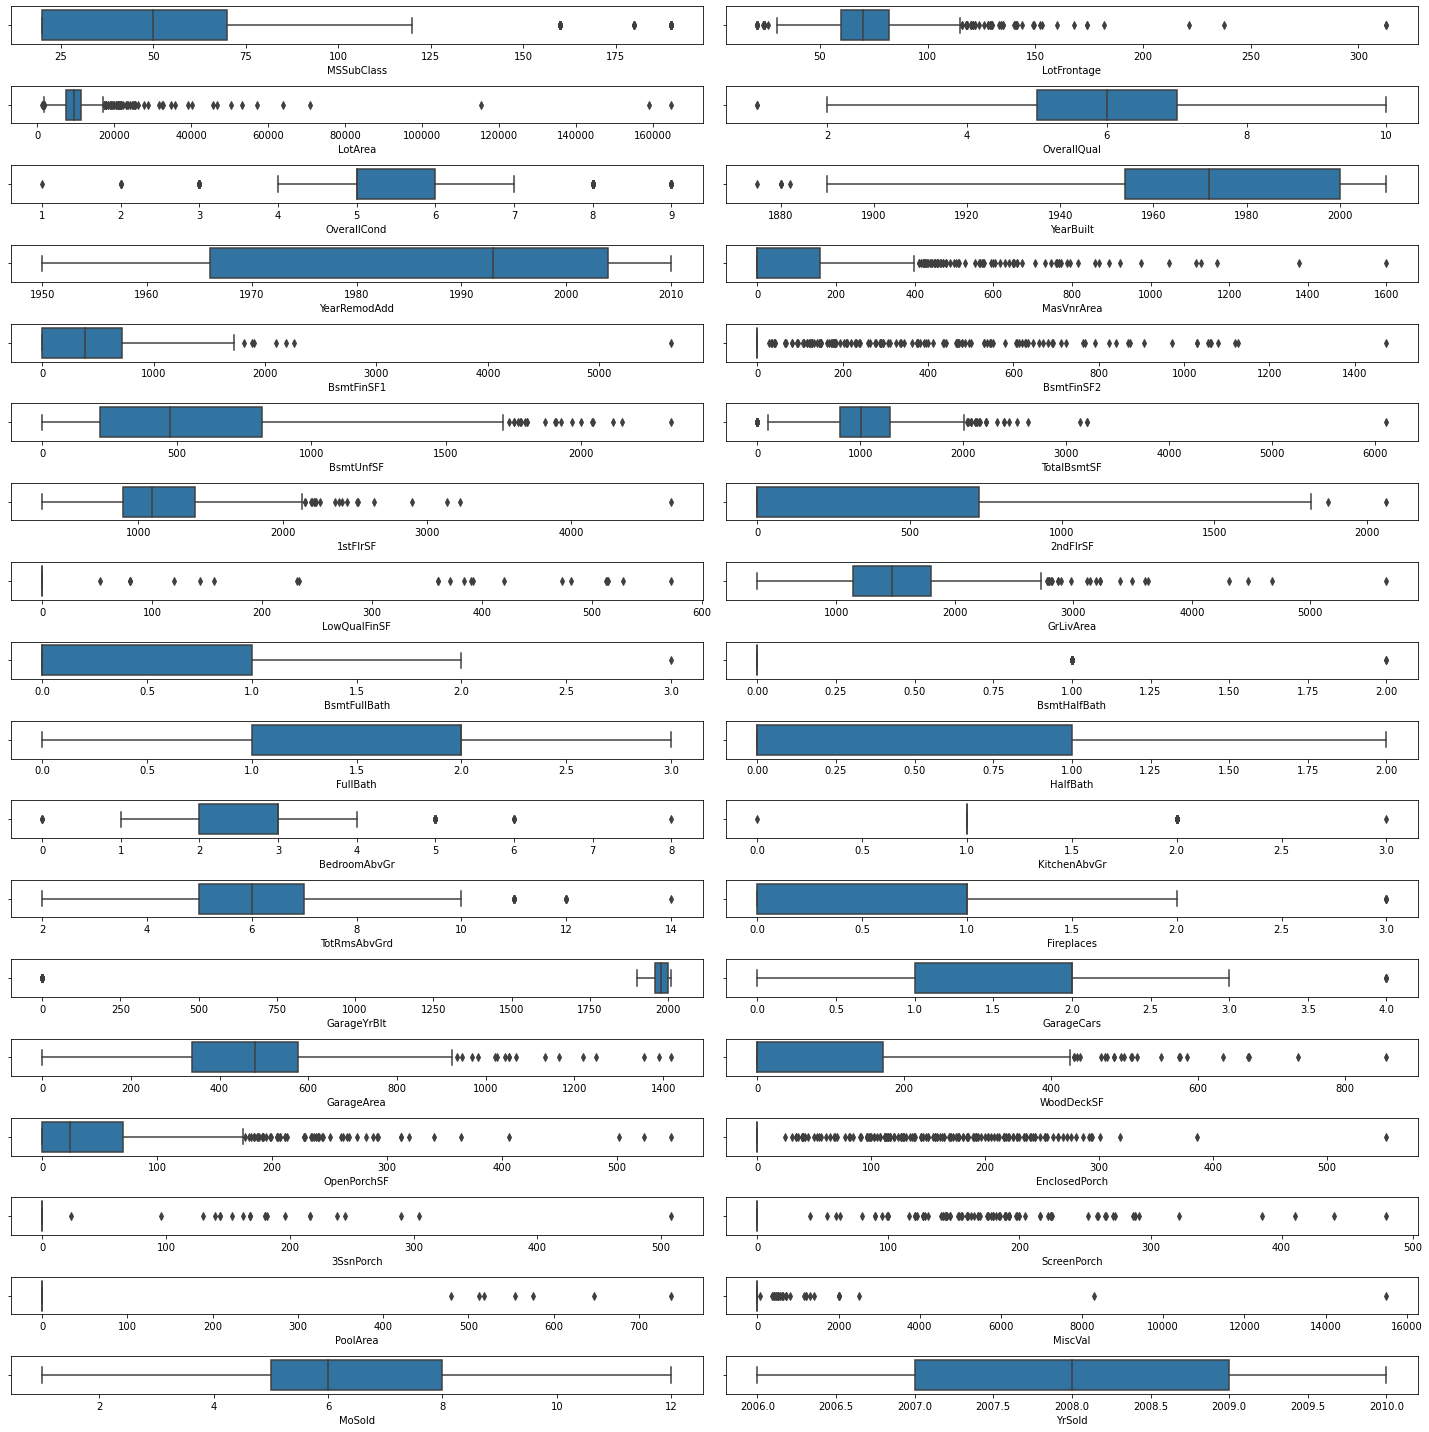

In [33]:
nrow=18
ncol=2
fig, axs = plt.subplots(nrow,ncol,figsize=(20,20))
for i in range(nrow):
    for j in range(ncol):
        ax = axs[i][j]
        r = i*ncol+j
        sns.boxplot(numdf[numdf.columns[r]],ax=ax)
plt.tight_layout()

Almost all columns have outliers and that too quite often.

In [34]:
#Let's calculate zscores of each columns and see what is the trend of highest zscores.
numdf.columns
#hsd['familyZ'] = stats.zscore(hsd['Family'], axis=0)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [35]:
from scipy.stats import zscore

In [36]:
for i,j in enumerate(numdf.columns):
    scores = zscore(numdf[j], axis=0)
    count = 0
    print("Maximum ZScore of {} is:".format(numdf.columns[i]),scores.max())
    print("Minimum ZScore of {} is:".format(numdf.columns[i]),scores.min())
    for k in scores:
        if k > 5 or k < -5:
            count += 1
    print('#values with zscore greater than 5 or smaller than -5 is:', count)
    print('-----------------------------------------------------------------------------------')
#zscore(numdf['MSSubClass'], axis=0).max()

Maximum ZScore of MSSubClass is: 3.178040691089323
Minimum ZScore of MSSubClass is: -0.8770424282931013
#values with zscore greater than 5 or smaller than -5 is: 0
-----------------------------------------------------------------------------------
Maximum ZScore of LotFrontage is: 9.476810720685279
Minimum ZScore of LotFrontage is: -2.0052788503746815
#values with zscore greater than 5 or smaller than -5 is: 4
-----------------------------------------------------------------------------------
Maximum ZScore of LotArea is: 17.219345388442505
Minimum ZScore of LotArea is: -1.0258155374201783
#values with zscore greater than 5 or smaller than -5 is: 6
-----------------------------------------------------------------------------------
Maximum ZScore of OverallQual is: 2.803444546972107
Minimum ZScore of OverallQual is: -3.6734365690214723
#values with zscore greater than 5 or smaller than -5 is: 0
-----------------------------------------------------------------------------------
Maximum Z

In [37]:
#numdf['3SsnPorchZ'] = zscore(numdf['3SsnPorch'],axis=0)
#numdf['3SsnPorchZ'].min()

3SsnPorch has the highest number of outliers when determined through '5' zscore, that is 16. In percentage terms we can say it is 1.37%

In [38]:
#numdf = numdf[(numdf['3SsnPorchZ'] > -5) & (numdf['3SsnPorchZ'] < 5)]
#numdf['3SsnPorchZ'].max()

In [39]:
#for i in numdf.columns[:-1]:
#    scores = zscore(numdf[i], axis=0)
#    count = 0
#    print("Maximum ZScore of {} is:".format(i),scores.max())
#    print("Minimum ZScore of {} is:".format(i),scores.min())
#    for k in scores:
#        if k > 5 or k < -5:
#            count += 1
#    print('#values with zscore greater than 5 or smaller than -5 is:', count)
#    print('-----------------------------------------------------------------------------------')
#zscore(numdf['MSSubClass'], axis=0).max()

In [40]:
#numdf['3SsnPorchZ'] = zscore(numdf['3SsnPorch'],axis=0)
#numdf['3SsnPorchZ'].max()

In [41]:
#numdf = numdf[(numdf['3SsnPorchZ'] > -5) & (numdf['3SsnPorchZ'] < 5)]
#numdf['3SsnPorchZ'].max()

In [42]:
#for i in numdf.columns[:-1]:
#    scores = zscore(numdf[i], axis=0)
#    count = 0
#    print("Maximum ZScore of {} is:".format(i),scores.max())
#    print("Minimum ZScore of {} is:".format(i),scores.min())
#    for k in scores:
#        if k > 5 or k < -5:
#            count += 1
#    print('#values with zscore greater than 5 or smaller than -5 is:', count)
#    print('-----------------------------------------------------------------------------------')

# We removed the rows with zscores outside of (-5,5) 2 times but still there are values remaining with zscores outside of (-5,5), because as we have removed the rows the columns values and counts of values also changed, with it the zscores. I believe we should let it be.

# Correlation

In [43]:
#Since we have large number of columns we should break down our dataset into smaller datasets.
len(numdf.columns)

37

In [44]:
numdf1 = pd.concat([numdf.iloc[:,:9],numdf['SalePrice']], axis=1)
numdf2 = pd.concat([numdf.iloc[:,9:18],numdf['SalePrice']], axis=1)
numdf3 = pd.concat([numdf.iloc[:,18:27],numdf['SalePrice']], axis=1)
numdf4 = numdf.iloc[:,27:]
numdf.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [45]:
numdf1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120        41.65     4928            6            5       1976   
1          20        95.00    15865            8            6       1970   
2          60        92.00     9920            7            5       1996   
3          20       105.00    11751            6            6       1977   
4          20        84.11    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  SalePrice  
0          1976         0.0         120     128000  
1          1970         0.0         351     268000  
2          1997         0.0         862     269790  
3          1977       480.0         705     190000  
4          2000       126.0        1246     215000

In [46]:
numdf2.head()

BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        958         1078       958         0             0   
1         823       1043         2217      2217         0             0   
2           0        255         1117      1127       886             0   
3           0       1139         1844      1844         0             0   
4           0        356         1602      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  SalePrice  
0        958             0             0     128000  
1       2217             1             0     268000  
2       2013             1             0     269790  
3       1844             0             0     190000  
4       1602             0             1     215000

In [47]:
numdf3.head()

FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  SalePrice  
0       1977.0           2         440     128000  
1       1970.0           2         621     268000  
2       1997.0           2         455     269790  
3       1977.0           2         546     190000  
4       1977.0           2         529     215000

In [48]:
numdf4.head()

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0          205              0          0            0         0   
1          81          207              0          0          224         0   
2         180          130              0          0            0         0   
3           0          122              0          0            0         0   
4         240            0              0          0            0         0   

   MiscVal  MoSold  YrSold  SalePrice  
0        0       2    2007     128000  
1        0      10    2007     268000  
2        0       6    2007     269790  
3        0       1    2010     190000  
4        0       6    2009     215000

In [49]:
numdf1.corr().sort_values(by='SalePrice', ascending=False)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
SalePrice      -0.060775     0.298488  0.249499     0.789185    -0.065642   
OverallQual     0.070462     0.171627  0.107188     1.000000    -0.083167   
YearBuilt       0.023988     0.055778  0.005506     0.575800    -0.377731   
YearRemodAdd    0.056618     0.036586  0.027228     0.555945     0.080669   
MasVnrArea      0.028215     0.165014  0.120192     0.403985    -0.135133   
BsmtFinSF1     -0.052236     0.221857  0.221851     0.219643    -0.028810   
LotFrontage    -0.336834     1.000000  0.446767     0.171627    -0.026297   
LotArea        -0.124151     0.446767  1.000000     0.107188     0.017513   
MSSubClass      1.000000    -0.336834 -0.124151     0.070462    -0.056978   
OverallCond    -0.056978    -0.026297  0.017513    -0.083167     1.000000   

              YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  SalePrice  
SalePrice      0.514408      0.507831    0.460535    0.362874   1.000000  
OverallQual    0.575800      0.555945    0.403985    0.219643   0.789185  
YearBuilt      1.000000      0.592829    0.318562    0.227933   0.514408  
YearRemodAdd   0.592829      1.000000    0.178583    0.114430   0.507831  
MasVnrArea     0.318562      0.178583    1.000000    0.263377   0.460535  
BsmtFinSF1     0.227933      0.114430    0.263377    1.000000   0.362874  
LotFrontage    0.055778      0.036586    0.165014    0.221857   0.298488  
LotArea        0.005506      0.027228    0.120192    0.221851   0.249499  
MSSubClass     0.023988      0.056618    0.028215   -0.052236  -0.060775  
OverallCond   -0.377731      0.080669   -0.135133   -0.028810  -0.065642

In [50]:
numdf2.corr().sort_values(by='SalePrice', ascending=False)

BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
SalePrice      -0.010151   0.215724     0.595042  0.587642  0.330386   
GrLivArea      -0.007484   0.232920     0.461067  0.566049  0.684802   
TotalBsmtSF     0.098167   0.414186     1.000000  0.813357 -0.164795   
1stFlrSF        0.093442   0.307437     0.813357  1.000000 -0.205683   
2ndFlrSF       -0.092049   0.002736    -0.164795 -0.205683  1.000000   
BsmtUnfSF      -0.213580   1.000000     0.414186  0.307437  0.002736   
BsmtFullBath    0.163518  -0.431740     0.296654  0.238026 -0.162017   
BsmtFinSF2      1.000000  -0.213580     0.098167  0.093442 -0.092049   
BsmtHalfBath    0.093692  -0.090372     0.009657  0.011042 -0.025422   
LowQualFinSF   -0.000577   0.030088    -0.043845 -0.035870  0.046447   

              LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  SalePrice  
SalePrice        -0.032381   0.707300      0.212924     -0.011109   1.000000  
GrLivArea         0.108485   1.000000      0.036206     -0.013145   0.707300  
TotalBsmtSF      -0.043845   0.461067      0.296654      0.009657   0.595042  
1stFlrSF         -0.035870   0.566049      0.238026      0.011042   0.587642  
2ndFlrSF          0.046447   0.684802     -0.162017     -0.025422   0.330386  
BsmtUnfSF         0.030088   0.232920     -0.431740     -0.090372   0.215724  
BsmtFullBath     -0.054033   0.036206      1.000000     -0.150317   0.212924  
BsmtFinSF2       -0.000577  -0.007484      0.163518      0.093692  -0.010151  
BsmtHalfBath     -0.001615  -0.013145     -0.150317      1.000000  -0.011109  
LowQualFinSF      1.000000   0.108485     -0.054033     -0.001615  -0.032381

In [51]:
numdf3.corr().sort_values(by='SalePrice', ascending=False)

FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
SalePrice     0.554988  0.295592      0.158281     -0.132108      0.528363   
GarageCars    0.468193  0.210440      0.058834     -0.043343      0.348490   
GarageArea    0.405734  0.159370      0.028543     -0.063298      0.323087   
FullBath      1.000000  0.115699      0.357069      0.137740      0.544319   
TotRmsAbvGrd  0.544319  0.333965      0.672542      0.248418      1.000000   
Fireplaces    0.230161  0.200203      0.100466     -0.113977      0.329297   
HalfBath      0.115699  1.000000      0.198263     -0.075331      0.333965   
GarageYrBlt   0.153987  0.113604     -0.015425     -0.129527      0.109250   
BedroomAbvGr  0.357069  0.198263      1.000000      0.204218      0.672542   
KitchenAbvGr  0.137740 -0.075331      0.204218      1.000000      0.248418   

              Fireplaces  GarageYrBlt  GarageCars  GarageArea  SalePrice  
SalePrice       0.459611     0.265622    0.628329    0.619000   1.000000  
GarageCars      0.281100     0.599013    1.000000    0.877542   0.628329  
GarageArea      0.252903     0.560507    0.877542    1.000000   0.619000  
FullBath        0.230161     0.153987    0.468193    0.405734   0.554988  
TotRmsAbvGrd    0.329297     0.109250    0.348490    0.323087   0.528363  
Fireplaces      1.000000     0.184047    0.281100    0.252903   0.459611  
HalfBath        0.200203     0.113604    0.210440    0.159370   0.295592  
GarageYrBlt     0.184047     1.000000    0.599013    0.560507   0.265622  
BedroomAbvGr    0.100466    -0.015425    0.058834    0.028543   0.158281  
KitchenAbvGr   -0.113977    -0.129527   -0.043343   -0.063298  -0.132108

In [52]:
numdf4.corr().sort_values(by='SalePrice', ascending=False)

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
SalePrice        0.315444     0.339500      -0.115004   0.060119     0.100284   
OpenPorchSF      0.056290     1.000000      -0.087114   0.003635     0.066200   
WoodDeckSF       1.000000     0.056290      -0.125435  -0.029961    -0.079504   
PoolArea         0.080366     0.067968       0.057362  -0.009619     0.058121   
ScreenPorch     -0.079504     0.066200      -0.082195  -0.034219     1.000000   
MoSold           0.009254     0.068807      -0.036523   0.020406     0.033064   
3SsnPorch       -0.029961     0.003635      -0.040127   1.000000    -0.034219   
MiscVal         -0.006860    -0.018066       0.021375  -0.010906     0.040486   
YrSold           0.030975    -0.065735      -0.005767   0.014440     0.017312   
EnclosedPorch   -0.125435    -0.087114       1.000000  -0.040127    -0.082195   

               PoolArea   MiscVal    MoSold    YrSold  SalePrice  
SalePrice      0.103280 -0.013071  0.072764 -0.045508   1.000000  
OpenPorchSF    0.067968 -0.018066  0.068807 -0.065735   0.339500  
WoodDeckSF     0.080366 -0.006860  0.009254  0.030975   0.315444  
PoolArea       1.000000  0.029771 -0.038624 -0.066063   0.103280  
ScreenPorch    0.058121  0.040486  0.033064  0.017312   0.100284  
MoSold        -0.038624 -0.008773  1.000000 -0.144536   0.072764  
3SsnPorch     -0.009619 -0.010906  0.020406  0.014440   0.060119  
MiscVal        0.029771  1.000000 -0.008773 -0.008439  -0.013071  
YrSold        -0.066063 -0.008439 -0.144536  1.000000  -0.045508  
EnclosedPorch  0.057362  0.021375 -0.036523 -0.005767  -0.115004

BsmtFinSF2: -0.010151

BsmtHalfBath: -0.011109

3SsnPorch: 0.060119

MiscVal: -0.013071

These are the columns who are having very low correlation with the SalePrice

In [53]:
df.drop(['BsmtFinSF2','BsmtHalfBath','3SsnPorch','MiscVal'],1,inplace=True)

In [54]:
numdf1 = pd.concat([numdf.iloc[:,:8],numdf['SalePrice']], axis=1)
numdf2 = pd.concat([numdf.iloc[:,8:17],numdf['SalePrice']], axis=1)
numdf3 = pd.concat([numdf.iloc[:,17:26],numdf['SalePrice']], axis=1)
numdf4 = numdf.iloc[:,26:]
numdf.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

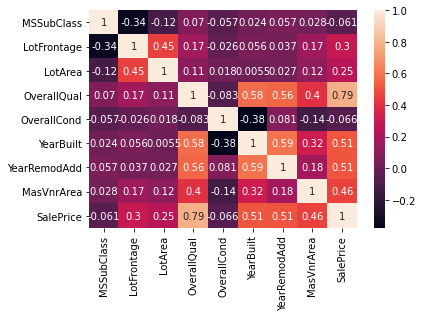

In [55]:
#Let's find out inter correlated columns.
sns.heatmap(numdf1.corr(), annot=True)

In [56]:
#YearBuilt and YearRemodAdd are both 0.51 dependent on SalePrice and are inter dependent too, so let's remove 1 of them
df.drop(['YearRemodAdd'],1,inplace=True)

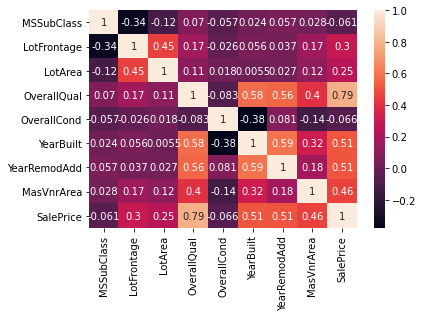

In [57]:
#Let's find out inter correlated columns.
sns.heatmap(numdf1.corr(), annot=True)

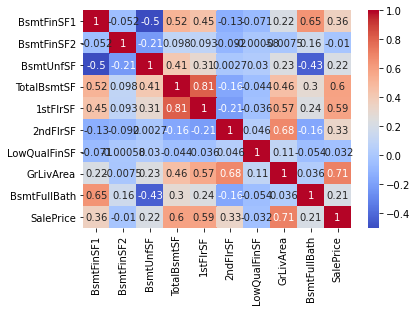

In [58]:
#Let's find out inter correlated columns.
sns.heatmap(numdf2.corr(), annot=True, cmap='coolwarm')

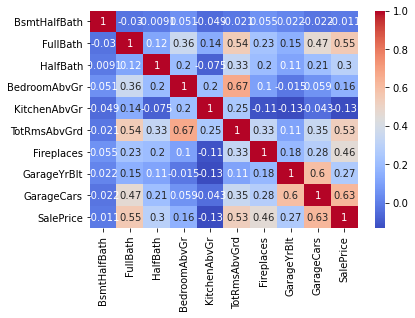

In [59]:
#Let's find out inter correlated columns.
sns.heatmap(numdf3.corr(), annot=True, cmap='coolwarm')

In [60]:
df[['GarageCars','GarageArea']].corr()
#GarageCars and GarageArea are similarly dpendent on SalePrice and are almost 88% dependent on each other, now since we have many columns in our datase, we can remove the one relatively less dependent on SalePrice which is GarageArea

GarageCars  GarageArea
GarageCars    1.000000    0.877542
GarageArea    0.877542    1.000000

In [61]:
df.drop(['GarageArea'],1,inplace=True)

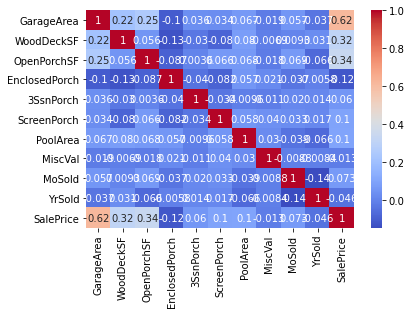

In [62]:
#Let's find out inter correlated columns.
sns.heatmap(numdf4.corr(), annot=True, cmap='coolwarm')

# Data cleaning and EDA is complete let's move to data splitting, scaling normalizing.

In [63]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 69, dtype: object

In [64]:
for i in df.columns:
    print("#Unique values in {} are:".format(i),len(df[i].unique()))

#Unique values in MSSubClass are: 15
#Unique values in MSZoning are: 5
#Unique values in LotFrontage are: 263
#Unique values in LotArea are: 892
#Unique values in Street are: 2
#Unique values in LotShape are: 4
#Unique values in LandContour are: 4
#Unique values in Utilities are: 1
#Unique values in LotConfig are: 5
#Unique values in LandSlope are: 3
#Unique values in Neighborhood are: 25
#Unique values in Condition1 are: 9
#Unique values in Condition2 are: 8
#Unique values in BldgType are: 5
#Unique values in HouseStyle are: 8
#Unique values in OverallQual are: 10
#Unique values in OverallCond are: 9
#Unique values in YearBuilt are: 110
#Unique values in RoofStyle are: 6
#Unique values in RoofMatl are: 8
#Unique values in Exterior1st are: 14
#Unique values in Exterior2nd are: 15
#Unique values in MasVnrType are: 5
#Unique values in MasVnrArea are: 283
#Unique values in ExterQual are: 4
#Unique values in ExterCond are: 5
#Unique values in Foundation are: 6
#Unique values in BsmtQual ar

There are quite large number of unique values in almost every columns, let's encode the object columns, using label endcoder, we won't use one hot encoding because of the there will be far too many columns to deal with and it would take a lot longer to process.

In [65]:
#There is single unique data in Utilities columns, let's drop it
df.drop(['Utilities'],1,inplace=True)

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
objdf = df.select_dtypes(include=['object'])
objdf.head()

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL   Pave      IR1         Lvl    Inside       Gtl      NPkVill   
1       RL   Pave      IR1         Lvl    Inside       Mod        NAmes   
2       RL   Pave      IR1         Lvl   CulDSac       Gtl      NoRidge   
3       RL   Pave      IR1         Lvl    Inside       Gtl       NWAmes   
4       RL   Pave      IR1         Lvl       FR2       Gtl       NWAmes   

  Condition1 Condition2 BldgType  ... Electrical KitchenQual Functional  \
0       Norm       Norm   TwnhsE  ...      SBrkr          TA        Typ   
1       Norm       Norm     1Fam  ...      SBrkr          Gd        Typ   
2       Norm       Norm     1Fam  ...      SBrkr          TA        Typ   
3       Norm       Norm     1Fam  ...      SBrkr          TA        Typ   
4       Norm       Norm     1Fam  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          Unf         TA         TA          Y       WD   
2     Attchd          Unf         TA         TA          Y       WD   
3     Attchd          RFn         TA         TA          Y      COD   
4     Attchd          Fin         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal  

[5 rows x 37 columns]

In [68]:
for i in objdf.columns:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        pass

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   int32  
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   int32  
 5   LotShape       1168 non-null   int32  
 6   LandContour    1168 non-null   int32  
 7   LotConfig      1168 non-null   int32  
 8   LandSlope      1168 non-null   int32  
 9   Neighborhood   1168 non-null   int32  
 10  Condition1     1168 non-null   int32  
 11  Condition2     1168 non-null   int32  
 12  BldgType       1168 non-null   int32  
 13  HouseStyle     1168 non-null   int32  
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  RoofStyle      1168 non-null   int32  
 18  RoofMatl

In [70]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120         3        41.65     4928       1         0            3   
1          20         3        95.00    15865       1         0            3   
2          60         3        92.00     9920       1         0            3   
3          20         3       105.00    11751       1         0            3   
4          20         3        84.11    16635       1         0            3   

   LotConfig  LandSlope  Neighborhood  ...  WoodDeckSF  OpenPorchSF  \
0          4          0            13  ...           0          205   
1          4          1            12  ...          81          207   
2          1          0            15  ...         180          130   
3          4          0            14  ...           0          122   
4          2          0            14  ...         240            0   

   EnclosedPorch  ScreenPorch  PoolArea  MoSold  YrSold  SaleType  \
0              0            0         0       2    2007         8   
1              0          224         0      10    2007         8   
2              0            0         0       6    2007         8   
3              0            0         0       1    2010         0   
4              0            0         0       6    2009         8   

   SaleCondition  SalePrice  
0              4     128000  
1              4     268000  
2              4     269790  
3              4     190000  
4              4     215000  

[5 rows x 68 columns]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = df.drop(['SalePrice'],1)
y = df['SalePrice']

# Scaling and Transformation

In [73]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
pt = PowerTransformer(method = 'yeo-johnson')
mms = MinMaxScaler(feature_range=(0, 2))

In [74]:
for i in X.columns:
    print("{} skewness is:".format(i),X[i].skew())

MSSubClass skewness is: 1.422018988135284
MSZoning skewness is: -1.7967850975188662
LotFrontage skewness is: 2.294882921536503
LotArea skewness is: 10.659284548299626
Street skewness is: -17.021969279861406
LotShape skewness is: -0.6037752483890678
LandContour skewness is: -3.125981609220846
LotConfig skewness is: -1.118821122735627
LandSlope skewness is: 4.812567939321139
Neighborhood skewness is: 0.043735292946020986
Condition1 skewness is: 3.008289061615448
Condition2 skewness is: 11.51445787731543
BldgType skewness is: 2.3186565788172033
HouseStyle skewness is: 0.2856801863402313
OverallQual skewness is: 0.1750824992845271
OverallCond skewness is: 0.5807139655333367
YearBuilt skewness is: -0.5792035025736898
RoofStyle skewness is: 1.4985601535327249
RoofMatl skewness is: 7.577352367722009
Exterior1st skewness is: -0.6128162942734297
Exterior2nd skewness is: -0.5923490009398771
MasVnrType skewness is: -0.4708520776588144
MasVnrArea skewness is: 2.835718180934954
ExterQual skewness i

In [75]:
#There are lots of columns having skewness, let's normalize the data first

for i in X.columns:
    if X[i].skew() > 5 or X[i].skew() < -5:
        X[i] = pt.fit_transform(X[[i]])

In [76]:
for i in X.columns:
    print("{} skewness is:".format(i),X[i].skew())

MSSubClass skewness is: 1.422018988135284
MSZoning skewness is: -1.7967850975188662
LotFrontage skewness is: 2.294882921536503
LotArea skewness is: 0.032508958395610514
Street skewness is: -17.021969279861406
LotShape skewness is: -0.6037752483890678
LandContour skewness is: -3.125981609220846
LotConfig skewness is: -1.118821122735627
LandSlope skewness is: 4.812567939321139
Neighborhood skewness is: 0.043735292946020986
Condition1 skewness is: 3.008289061615448
Condition2 skewness is: 0.5372767379993716
BldgType skewness is: 2.3186565788172033
HouseStyle skewness is: 0.2856801863402313
OverallQual skewness is: 0.1750824992845271
OverallCond skewness is: 0.5807139655333367
YearBuilt skewness is: -0.5792035025736898
RoofStyle skewness is: 1.4985601535327249
RoofMatl skewness is: -6.314986624321029
Exterior1st skewness is: -0.6128162942734297
Exterior2nd skewness is: -0.5923490009398771
MasVnrType skewness is: -0.4708520776588144
MasVnrArea skewness is: 2.835718180934954
ExterQual skewne

In [77]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0         120         3        41.65 -1.213954  0.058621         0   
1          20         3        95.00  1.100521  0.058621         0   
2          60         3        92.00  0.158048  0.058621         0   
3          20         3       105.00  0.496002  0.058621         0   
4          20         3        84.11  1.196626  0.058621         0   

   LandContour  LotConfig  LandSlope  Neighborhood  ...  PavedDrive  \
0            3          4          0            13  ...           2   
1            3          4          1            12  ...           2   
2            3          1          0            15  ...           2   
3            3          4          0            14  ...           2   
4            3          2          0            14  ...           2   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  PoolArea  MoSold  \
0           0          205              0            0 -0.077648       2   
1          81          207              0          224 -0.077648      10   
2         180          130              0            0 -0.077648       6   
3           0          122              0            0 -0.077648       1   
4         240            0              0            0 -0.077648       6   

   YrSold  SaleType  SaleCondition  
0    2007         8              4  
1    2007         8              4  
2    2007         8              4  
3    2010         0              4  
4    2009         8              4  

[5 rows x 67 columns]

In [78]:
X.describe()

MSSubClass     MSZoning  LotFrontage       LotArea        Street  \
count  1168.000000  1168.000000  1168.000000  1.168000e+03  1.168000e+03   
mean     56.767979     3.013699    71.996068 -1.090119e-15  1.754221e-15   
std      41.940650     0.633120    25.441805  1.000428e+00  1.000428e+00   
min      20.000000     0.000000    21.000000 -3.723595e+00 -1.705872e+01   
25%      20.000000     3.000000    60.000000 -3.633405e-01  5.862104e-02   
50%      50.000000     3.000000    70.000000  7.679443e-02  5.862104e-02   
75%      70.000000     3.000000    82.000000  4.554907e-01  5.862104e-02   
max     190.000000     4.000000   313.000000  6.067614e+00  5.862104e-02   

          LotShape  LandContour    LotConfig    LandSlope  Neighborhood  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  ...   
mean      1.938356     2.773973     3.004281     0.064212     12.145548  ...   
std       1.412262     0.710027     1.642667     0.284088      6.010364  ...   
min       0.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       0.000000     3.000000     2.000000     0.000000      7.000000  ...   
50%       3.000000     3.000000     4.000000     0.000000     12.000000  ...   
75%       3.000000     3.000000     4.000000     0.000000     17.000000  ...   
max       3.000000     3.000000     4.000000     2.000000     24.000000  ...   

        PavedDrive   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean      1.853596    96.206336    46.559932      23.015411    15.051370   
std       0.501894   126.158988    66.381023      63.191089    55.080816   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       2.000000     0.000000     0.000000       0.000000     0.000000   
50%       2.000000     0.000000    24.000000       0.000000     0.000000   
75%       2.000000   171.000000    70.000000       0.000000     0.000000   
max       2.000000   857.000000   547.000000     552.000000   480.000000   

           PoolArea       MoSold       YrSold     SaleType  SaleCondition  
count  1.168000e+03  1168.000000  1168.000000  1168.000000    1168.000000  
mean  -5.772114e-17     6.344178  2007.804795     7.465753       3.768836  
std    1.000428e+00     2.686352     1.329738     1.619459       1.112208  
min   -7.764847e-02     1.000000  2006.000000     0.000000       0.000000  
25%   -7.764847e-02     5.000000  2007.000000     8.000000       4.000000  
50%   -7.764847e-02     6.000000  2008.000000     8.000000       4.000000  
75%   -7.764847e-02     8.000000  2009.000000     8.000000       4.000000  
max    1.287855e+01    12.000000  2010.000000     8.000000       5.000000  

[8 rows x 67 columns]

In [79]:
#Scaling
for i in X.columns:
    X[i] = mms.fit_transform(X[[i]])

In [80]:
X.describe()

MSSubClass     MSZoning  LotFrontage      LotArea       Street  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.432564     1.506849     0.349288     0.760600     1.993151   
std       0.493419     0.316560     0.174259     0.204352     0.116891   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.500000     0.267123     0.686382     2.000000   
50%       0.352941     1.500000     0.335616     0.776286     2.000000   
75%       0.588235     1.500000     0.417808     0.853640     2.000000   
max       2.000000     2.000000     2.000000     2.000000     2.000000   

          LotShape  LandContour    LotConfig    LandSlope  Neighborhood  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  ...   
mean      1.292237     1.849315     1.502140     0.064212      1.012129  ...   
std       0.941508     0.473351     0.821333     0.284088      0.500864  ...   
min       0.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       0.000000     2.000000     1.000000     0.000000      0.583333  ...   
50%       2.000000     2.000000     2.000000     0.000000      1.000000  ...   
75%       2.000000     2.000000     2.000000     0.000000      1.416667  ...   
max       2.000000     2.000000     2.000000     2.000000      2.000000  ...   

        PavedDrive   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean      1.853596     0.224519     0.170237       0.083389     0.062714   
std       0.501894     0.294420     0.242709       0.228953     0.229503   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       2.000000     0.000000     0.000000       0.000000     0.000000   
50%       2.000000     0.000000     0.087751       0.000000     0.000000   
75%       2.000000     0.399067     0.255941       0.000000     0.000000   
max       2.000000     2.000000     2.000000       2.000000     2.000000   

          PoolArea       MoSold       YrSold     SaleType  SaleCondition  
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000  
mean      0.011986     0.971669     0.902397     1.866438       1.507534  
std       0.154432     0.488428     0.664869     0.404865       0.444883  
min       0.000000     0.000000     0.000000     0.000000       0.000000  
25%       0.000000     0.727273     0.500000     2.000000       1.600000  
50%       0.000000     0.909091     1.000000     2.000000       1.600000  
75%       0.000000     1.272727     1.500000     2.000000       1.600000  
max       2.000000     2.000000     2.000000     2.000000       2.000000  

[8 rows x 67 columns]

# Model building

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
#Models Import
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

#Metrics Import
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
def classify(model, X, y):
    # Model training
    model.fit(X, y)
    pred = model.predict(X)
    print("MSE is:",mean_squared_error(y,pred))
    #Cross validation
    score = cross_val_score(model, X,y, cv=5)
    print("Cross validation score is :",(np.mean(score)))
    return np.abs(np.mean(score))

In [84]:
#Model Initialization
lm = LinearRegression()
rr = Ridge()
ls = Lasso()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()

#Model Parameters
rrparams = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0], 'random_state': range(70,150)}
lsparams = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0], 'random_state': range(70,150)}
dtrparams = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'], 'min_samples_split' : range(10),
            'random_state' : range(70,150)}
rfrparams = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'], 'n_estimators' : range(50,80),
             'random_state' : range(70,150)}
etrparams = {'criterion' : ['mse', 'friedman_mse', 'mae'], 'min_samples_split' : range(10),
            'random_state' : range(70,150)}
gbrparams = {'loss' : ['ls', 'lad', 'huber', 'quantile'], 'n_estimators' : range(50,80),
             'criterion' : ['mse', 'friedman_mse', 'mae'], 'random_state' : range(70,150)}

In [85]:
def rstate(model, X, y):
    mse = []
    for i in range(1,201):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=i)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse.append(mean_squared_error(y_test, pred))
    return mse.index(min(mse))+1

In [86]:
lmRS = rstate(lm, X, y)
print("Linear Model best random state is: ",lmRS)

Linear Model best random state is:  174


In [87]:
model_score_table = pd.DataFrame(columns=['Model Name','Params', 'MSE Score', 'R2 Score'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=lmRS)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
print("MSE:",mean_squared_error(y_test, pred))
print("R2 Score:",r2_score(y_test, pred))

MSE: 539448095.1253458
R2 Score: 0.8757193612710779


In [89]:
model_score_table.loc[0] = ["Linear Regression", {'random_state': lmRS}, mean_squared_error(y_test, pred), r2_score(y_test, pred)]
model_score_table

Model Name                 Params     MSE Score  R2 Score
0  Linear Regression  {'random_state': 174}  5.394481e+08  0.875719

In [90]:
rrgs = RandomizedSearchCV(rr, rrparams, return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
rrgs.fit(X, y)
rrDF = pd.DataFrame(rrgs.cv_results_)
rrDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

params  mean_test_neg_mean_squared_error  \
34     {'random_state': 100, 'alpha': 1.0}                     -1.473039e+09   
24     {'random_state': 114, 'alpha': 1.0}                     -1.473039e+09   
45     {'random_state': 121, 'alpha': 1.0}                     -1.473039e+09   
48     {'random_state': 142, 'alpha': 1.0}                     -1.473039e+09   
91      {'random_state': 90, 'alpha': 1.0}                     -1.473039e+09   
..                                     ...                               ...   
56   {'random_state': 97, 'alpha': 0.0001}                     -1.548833e+09   
74  {'random_state': 109, 'alpha': 0.0001}                     -1.548833e+09   
60  {'random_state': 130, 'alpha': 0.0001}                     -1.548833e+09   
61  {'random_state': 124, 'alpha': 0.0001}                     -1.548833e+09   
0   {'random_state': 119, 'alpha': 0.0001}                     -1.548833e+09   

    rank_test_neg_mean_squared_error  mean_test_r2  rank_test_r2  
34                                 1      0.760861             1  
24                                 1      0.760861             1  
45                                 1      0.760861             1  
48                                 1      0.760861             1  
91                                 1      0.760861             1  
..                               ...           ...           ...  
56                                80      0.747699            80  
74                                80      0.747699            80  
60                                80      0.747699            80  
61                                80      0.747699            80  
0                                 80      0.747699            80  

[100 rows x 5 columns]

In [91]:
i = list(rrDF['mean_test_neg_mean_squared_error']).index(rrDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[1] = ["Ridge Regressor", rrDF['params'][i], rrDF['mean_test_neg_mean_squared_error'][i], rrDF['mean_test_r2'][i]]
model_score_table

Model Name                               Params     MSE Score  \
0  Linear Regression                {'random_state': 174}  5.394481e+08   
1    Ridge Regressor  {'random_state': 137, 'alpha': 1.0} -1.473039e+09   

   R2 Score  
0  0.875719  
1  0.760861

In [92]:
lsgs = RandomizedSearchCV(ls, lsparams,return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
lsgs.fit(X, y)
lsDF = pd.DataFrame(lsgs.cv_results_)
lsDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

params  mean_test_neg_mean_squared_error  \
61     {'random_state': 139, 'alpha': 1.0}                     -1.546040e+09   
17      {'random_state': 97, 'alpha': 1.0}                     -1.546040e+09   
19     {'random_state': 118, 'alpha': 1.0}                     -1.546040e+09   
20      {'random_state': 94, 'alpha': 1.0}                     -1.546040e+09   
36      {'random_state': 72, 'alpha': 1.0}                     -1.546040e+09   
..                                     ...                               ...   
35   {'random_state': 70, 'alpha': 0.0001}                     -1.548831e+09   
16  {'random_state': 147, 'alpha': 0.0001}                     -1.548831e+09   
18  {'random_state': 124, 'alpha': 0.0001}                     -1.548831e+09   
44  {'random_state': 101, 'alpha': 0.0001}                     -1.548831e+09   
87   {'random_state': 94, 'alpha': 0.0001}                     -1.548831e+09   

    rank_test_neg_mean_squared_error  mean_test_r2  rank_test_r2  
61                                 1      0.748190             1  
17                                 1      0.748190             1  
19                                 1      0.748190             1  
20                                 1      0.748190             1  
36                                 1      0.748190             1  
..                               ...           ...           ...  
35                                84      0.747704            84  
16                                84      0.747704            84  
18                                84      0.747704            84  
44                                84      0.747704            84  
87                                84      0.747704            84  

[100 rows x 5 columns]

In [93]:
i = list(lsDF['mean_test_neg_mean_squared_error']).index(lsDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[2] = ["Lasso Regressor", lsDF['params'][i], lsDF['mean_test_neg_mean_squared_error'][i], lsDF['mean_test_r2'][i]]
model_score_table

Model Name                               Params     MSE Score  \
0  Linear Regression                {'random_state': 174}  5.394481e+08   
1    Ridge Regressor  {'random_state': 137, 'alpha': 1.0} -1.473039e+09   
2    Lasso Regressor  {'random_state': 146, 'alpha': 1.0} -1.546040e+09   

   R2 Score  
0  0.875719  
1  0.760861  
2  0.748190

In [94]:
dtrgs = RandomizedSearchCV(dtr, dtrparams,return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
dtrgs.fit(X, y)
dtrDF = pd.DataFrame(dtrgs.cv_results_)
dtrDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

params  \
16  {'random_state': 147, 'min_samples_split': 8, ...   
14  {'random_state': 112, 'min_samples_split': 8, ...   
68  {'random_state': 130, 'min_samples_split': 7, ...   
15  {'random_state': 115, 'min_samples_split': 8, ...   
52  {'random_state': 82, 'min_samples_split': 9, '...   
..                                                ...   
92  {'random_state': 113, 'min_samples_split': 6, ...   
94  {'random_state': 100, 'min_samples_split': 1, ...   
96  {'random_state': 81, 'min_samples_split': 0, '...   
97  {'random_state': 86, 'min_samples_split': 3, '...   
98  {'random_state': 101, 'min_samples_split': 0, ...   

    mean_test_neg_mean_squared_error  rank_test_neg_mean_squared_error  \
16                     -1.525113e+09                                 1   
14                     -1.537359e+09                                 2   
68                     -1.558237e+09                                 4   
15                     -1.569891e+09                                 7   
52                     -1.565418e+09                                 5   
..                               ...                               ...   
92                               NaN                                67   
94                               NaN                                64   
96                               NaN                                60   
97                               NaN                                59   
98                               NaN                                92   

    mean_test_r2  rank_test_r2  
16      0.750216             1  
14      0.749235             2  
68      0.745647             3  
15      0.744812             4  
52      0.744715             5  
..           ...           ...  
92           NaN            67  
94           NaN            69  
96           NaN            70  
97           NaN            62  
98           NaN            92  

[100 rows x 5 columns]

In [95]:
i = list(dtrDF['mean_test_neg_mean_squared_error']).index(dtrDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[3] = ["Decision Tree Regressor", dtrDF['params'][i], dtrDF['mean_test_neg_mean_squared_error'][i], dtrDF['mean_test_r2'][i]]
model_score_table

Model Name                                             Params  \
0        Linear Regression                              {'random_state': 174}   
1          Ridge Regressor                {'random_state': 137, 'alpha': 1.0}   
2          Lasso Regressor                {'random_state': 146, 'alpha': 1.0}   
3  Decision Tree Regressor  {'random_state': 147, 'min_samples_split': 8, ...   

      MSE Score  R2 Score  
0  5.394481e+08  0.875719  
1 -1.473039e+09  0.760861  
2 -1.546040e+09  0.748190  
3 -1.525113e+09  0.750216

In [96]:
rfrgs = RandomizedSearchCV(rfr, rfrparams,return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
rfrgs.fit(X, y)
rfrDF = pd.DataFrame(rfrgs.cv_results_)
rfrDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

params  \
78  {'random_state': 139, 'n_estimators': 57, 'cri...   
24  {'random_state': 123, 'n_estimators': 66, 'cri...   
93  {'random_state': 127, 'n_estimators': 57, 'cri...   
77  {'random_state': 112, 'n_estimators': 56, 'cri...   
10  {'random_state': 127, 'n_estimators': 55, 'cri...   
..                                                ...   
79  {'random_state': 148, 'n_estimators': 67, 'cri...   
81  {'random_state': 107, 'n_estimators': 58, 'cri...   
87  {'random_state': 146, 'n_estimators': 56, 'cri...   
89  {'random_state': 78, 'n_estimators': 73, 'crit...   
98  {'random_state': 78, 'n_estimators': 77, 'crit...   

    mean_test_neg_mean_squared_error  rank_test_neg_mean_squared_error  \
78                     -8.990721e+08                                 1   
24                     -9.118813e+08                                 2   
93                     -9.165081e+08                                 3   
77                     -9.201483e+08                                 4   
10                     -9.239166e+08                                 6   
..                               ...                               ...   
79                               NaN                                91   
81                               NaN                                97   
87                               NaN                                93   
89                               NaN                               100   
98                               NaN                                88   

    mean_test_r2  rank_test_r2  
78      0.854380             1  
24      0.851736             2  
93      0.851345             3  
77      0.850954             4  
10      0.850240             5  
..           ...           ...  
79           NaN            99  
81           NaN            98  
87           NaN            93  
89           NaN           100  
98           NaN            88  

[100 rows x 5 columns]

In [97]:
i = list(rfrDF['mean_test_neg_mean_squared_error']).index(rfrDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[4] = ["Random Forest Regressor", rfrDF['params'][i], rfrDF['mean_test_neg_mean_squared_error'][i], rfrDF['mean_test_r2'][i]]
model_score_table

Model Name                                             Params  \
0        Linear Regression                              {'random_state': 174}   
1          Ridge Regressor                {'random_state': 137, 'alpha': 1.0}   
2          Lasso Regressor                {'random_state': 146, 'alpha': 1.0}   
3  Decision Tree Regressor  {'random_state': 147, 'min_samples_split': 8, ...   
4  Random Forest Regressor  {'random_state': 139, 'n_estimators': 57, 'cri...   

      MSE Score  R2 Score  
0  5.394481e+08  0.875719  
1 -1.473039e+09  0.760861  
2 -1.546040e+09  0.748190  
3 -1.525113e+09  0.750216  
4 -8.990721e+08  0.854380

In [98]:
etrgs = RandomizedSearchCV(etr, etrparams,return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
etrgs.fit(X, y)
etrDF = pd.DataFrame(etrgs.cv_results_)
etrDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

params  \
40  {'random_state': 78, 'min_samples_split': 3, '...   
2   {'random_state': 105, 'min_samples_split': 7, ...   
84  {'random_state': 78, 'min_samples_split': 2, '...   
52  {'random_state': 137, 'min_samples_split': 5, ...   
19  {'random_state': 74, 'min_samples_split': 3, '...   
..                                                ...   
83  {'random_state': 114, 'min_samples_split': 0, ...   
86  {'random_state': 72, 'min_samples_split': 1, '...   
93  {'random_state': 97, 'min_samples_split': 1, '...   
94  {'random_state': 72, 'min_samples_split': 0, '...   
99  {'random_state': 95, 'min_samples_split': 0, '...   

    mean_test_neg_mean_squared_error  rank_test_neg_mean_squared_error  \
40                     -9.623710e+08                                 2   
2                      -9.583321e+08                                 1   
84                     -9.660075e+08                                 3   
52                     -9.670787e+08                                 4   
19                     -9.762130e+08                                 5   
..                               ...                               ...   
83                               NaN                                99   
86                               NaN                                82   
93                               NaN                                81   
94                               NaN                                83   
99                               NaN                               100   

    mean_test_r2  rank_test_r2  
40      0.844557             1  
2       0.844510             2  
84      0.844293             3  
52      0.843555             4  
19      0.842997             5  
..           ...           ...  
83           NaN            99  
86           NaN            81  
93           NaN            83  
94           NaN            82  
99           NaN           100  

[100 rows x 5 columns]

In [99]:
i = list(etrDF['mean_test_neg_mean_squared_error']).index(etrDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[5] = ["Extra Trees Regressor", etrDF['params'][i], etrDF['mean_test_neg_mean_squared_error'][i], etrDF['mean_test_r2'][i]]
model_score_table

Model Name                                             Params  \
0        Linear Regression                              {'random_state': 174}   
1          Ridge Regressor                {'random_state': 137, 'alpha': 1.0}   
2          Lasso Regressor                {'random_state': 146, 'alpha': 1.0}   
3  Decision Tree Regressor  {'random_state': 147, 'min_samples_split': 8, ...   
4  Random Forest Regressor  {'random_state': 139, 'n_estimators': 57, 'cri...   
5    Extra Trees Regressor  {'random_state': 105, 'min_samples_split': 7, ...   

      MSE Score  R2 Score  
0  5.394481e+08  0.875719  
1 -1.473039e+09  0.760861  
2 -1.546040e+09  0.748190  
3 -1.525113e+09  0.750216  
4 -8.990721e+08  0.854380  
5 -9.583321e+08  0.844510

In [100]:
model_score_table.sort_values(by="R2 Score", ascending=False)

Model Name                                             Params  \
0        Linear Regression                              {'random_state': 174}   
4  Random Forest Regressor  {'random_state': 139, 'n_estimators': 57, 'cri...   
5    Extra Trees Regressor  {'random_state': 105, 'min_samples_split': 7, ...   
1          Ridge Regressor                {'random_state': 137, 'alpha': 1.0}   
3  Decision Tree Regressor  {'random_state': 147, 'min_samples_split': 8, ...   
2          Lasso Regressor                {'random_state': 146, 'alpha': 1.0}   

      MSE Score  R2 Score  
0  5.394481e+08  0.875719  
4 -8.990721e+08  0.854380  
5 -9.583321e+08  0.844510  
1 -1.473039e+09  0.760861  
3 -1.525113e+09  0.750216  
2 -1.546040e+09  0.748190

In [101]:
model_score_table['MSE Score'] = model_score_table['MSE Score'].abs()

In [102]:
model_score_table.sort_values(by="MSE Score")

Model Name                                             Params  \
0        Linear Regression                              {'random_state': 174}   
4  Random Forest Regressor  {'random_state': 139, 'n_estimators': 57, 'cri...   
5    Extra Trees Regressor  {'random_state': 105, 'min_samples_split': 7, ...   
1          Ridge Regressor                {'random_state': 137, 'alpha': 1.0}   
3  Decision Tree Regressor  {'random_state': 147, 'min_samples_split': 8, ...   
2          Lasso Regressor                {'random_state': 146, 'alpha': 1.0}   

      MSE Score  R2 Score  
0  5.394481e+08  0.875719  
4  8.990721e+08  0.854380  
5  9.583321e+08  0.844510  
1  1.473039e+09  0.760861  
3  1.525113e+09  0.750216  
2  1.546040e+09  0.748190

In [103]:
#Best Model is Linear Regression Model with random_state as 174

In [104]:
pred = lm.predict(X_test)
pred

array([165500.90311377, 264577.93523704, 114960.0699776 , 304421.84419785,
       309788.22804992, 196760.68582176, 151566.48651905, 170407.93007502,
       231567.47113137, 244730.25849012,  97435.99888002, 115609.37171225,
       215800.23216172, 302328.6818366 , 108393.21128898, 314189.73646973,
       182003.60073022, 156462.77910843, 190434.91996276, 108758.70550753,
        83823.11752117, 215948.15768829, 213748.98356148, 244962.94634785,
       207294.23698114, 281859.0793233 , 104035.35959429, 258279.00995242,
       201208.39950737, 110701.99619938, 150507.54869605, 174455.28371023,
       302883.33786638, 255416.79346361, 168643.80048501, 230608.46930873,
       357440.9519091 ,  95628.22850564, 177650.46462852, 255036.37992935,
       122485.68316892, 171760.85108414, 177289.3055192 , 167240.96973821,
       104919.74340096, 155301.36771188, 227414.05595627, 224560.65430972,
        94720.49163007, 262043.67396706, 333843.73732586, 219976.32163147,
       262144.57519863, 2

In [105]:
mean_squared_error(y_test, pred)

539448095.1253458

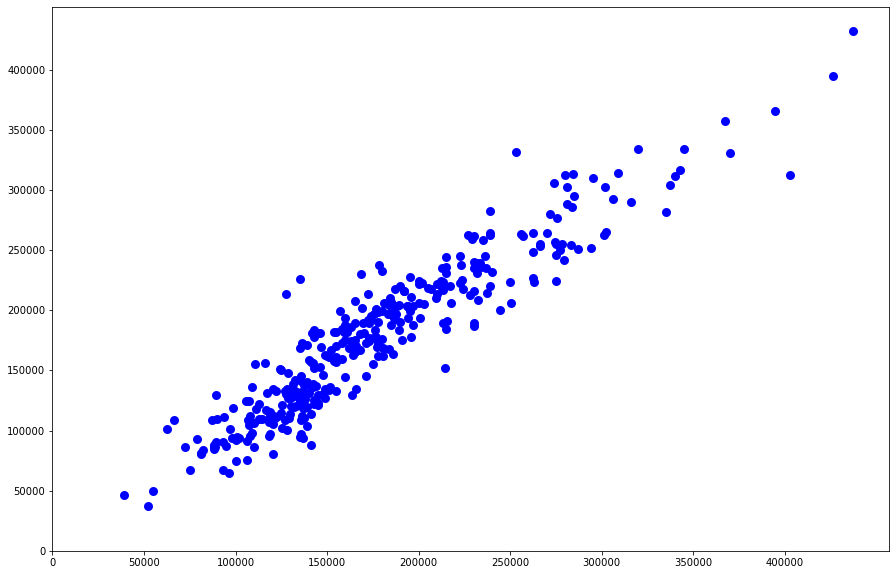

In [106]:
#plt.scatter(X_test, y_test,  color='black')
plt.figure(figsize=(15,10))
plt.scatter(y_test, pred, color='blue', linewidth=3)

plt.xticks((range(0,max(y_test), 50000)))
plt.yticks((range(0,int(max(pred)), 50000)))

plt.show()

In [107]:
#Our model is working very good.

# Let's predict test file values

In [108]:
#Reading the file
df = pd.read_csv('D:/DS Class/Fliprobo/Project-Housing_splitted/test.csv', na_values='')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [109]:
df.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], 1, inplace=True)
df.loc[df['BsmtQual'].isnull(), 'BsmtCond'] = '0'
df.loc[df['BsmtQual'].isnull(), 'BsmtExposure'] = '0'
df.loc[df['BsmtQual'].isnull(), 'BsmtFinType1'] = '0'
df.loc[df['BsmtQual'].isnull(), 'BsmtFinType2'] = '0'
df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtCond'] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtFinType1'] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtFinType2'] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtQual'] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtExposure'] = '0'
df.loc[df['BsmtFinType2'].isnull(), 'BsmtCond'] = '0'
df.loc[df['BsmtFinType2'].isnull(), 'BsmtFinType1'] = '0'
df.loc[df['BsmtFinType2'].isnull(), 'BsmtQual'] = '0'
df.loc[df['BsmtFinType2'].isnull(), 'BsmtExposure'] = '0'
df.loc[df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = '0'
df.loc[df['MasVnrType'].isnull(), 'MasVnrArea'] = 0
df.loc[df['MasVnrType'].isnull(), 'MasVnrType'] = '0'
df.loc[df['GarageType'].isnull(), 'GarageYrBlt'] = 0
df.loc[df['GarageType'].isnull(), 'GarageFinish'] = '0'
df.loc[df['GarageType'].isnull(), 'GarageQual'] = '0'
df.loc[df['GarageType'].isnull(), 'GarageCond'] = '0'
df.loc[df['GarageType'].isnull(), 'GarageType'] = '0'

In [110]:
df1 = df[['LotArea','LotFrontage']]

In [111]:
X_test = df1.loc[df1['LotFrontage'].isnull(), 'LotArea']
X_test = X_test.to_frame()
df1.dropna(inplace=True)
X_train = df1[['LotArea']]
y_train = df1['LotFrontage']

In [113]:
#Training the model
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [114]:
lm.fit(X_train,y_train)
y_test = rfr.predict(X_test)
df2 = pd.DataFrame(y_test, columns=['LotFrontage'])
X_test = X_test.reset_index()

In [115]:
df3 = pd.DataFrame(columns=['LotArea', 'LotFrontage'])
df3['LotArea'] = X_test['LotArea']
df3['LotFrontage'] = df2['LotFrontage']

In [116]:
df4 = pd.concat([df1,df3],0, ignore_index=True)
df4.rename(columns = {'LotFrontage': 'NewLotFrontage'}, inplace = True)

In [117]:
for i in df['LotArea']:
    df.loc[df['LotArea'] == i, 'LotFrontage'] = df4['NewLotFrontage'][df4.loc[df4['LotArea'] == i, 'NewLotFrontage'].index].to_list()[0]

In [118]:
df.drop(['Utilities', 'BsmtFinSF2', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'YearRemodAdd', 'GarageArea'],1,inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   LotConfig      292 non-null    object 
 8   LandSlope      292 non-null    object 
 9   Neighborhood   292 non-null    object 
 10  Condition1     292 non-null    object 
 11  Condition2     292 non-null    object 
 12  BldgType       292 non-null    object 
 13  HouseStyle     292 non-null    object 
 14  OverallQual    292 non-null    int64  
 15  OverallCond    292 non-null    int64  
 16  YearBuilt      292 non-null    int64  
 17  RoofStyle      292 non-null    object 
 18  RoofMatl  

In [120]:
df['Electrical'].isnull()[103]

True

In [121]:
df = df.drop(labels=103, axis=0)

In [122]:
for i in objdf.columns:
    df[i] = le.fit_transform(df[i])

In [123]:
X = df.copy()

In [124]:
#There are lots of columns having skewness, let's normalize the data first
for i in X.columns:
    if X[i].skew() > 5 or X[i].skew() < -5:
        X[i] = pt.fit_transform(X[[i]])

In [125]:
#Scaling
for i in X.columns:
    X[i] = mms.fit_transform(X[[i]])

In [126]:
import joblib

In [127]:
# save the model to disk
filename = 'final_model.pkl'
joblib.dump(lm, filename)

['final_model.pkl']

In [128]:
# load the model from disk
load_model = joblib.load(filename)

In [130]:
pred = load_model.predict(X)
#DOn't know what is wrong here, googled it as well, no help, checked all the cleaning steps followed all to the last bit, but still error.

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 67)